In [20]:
import pandas as pd
import re
import string
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [46]:
df = pd.read_csv("./dataset/dataset_tweet_sentiment_cellular_service_provider.csv")
df.head(10)

,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>
5,6,negative,Untuk penembakan paket dari <PRODUCT_NAME> mas...
6,7,positive,"<PROVIDER_NAME> aku pakai <PROVIDER_NAME>, pa..."
7,8,negative,RT <USER_MENTION>: <PROVIDER_NAME> tak ada lag...
8,9,negative,keluhan gak ditanggapi. bikin emosi aja. pulsa...
9,10,negative,#Bilboard iklan <PROVIDER_NAME> kok ada pesan ...


In [47]:
df.shape

(300, 3)

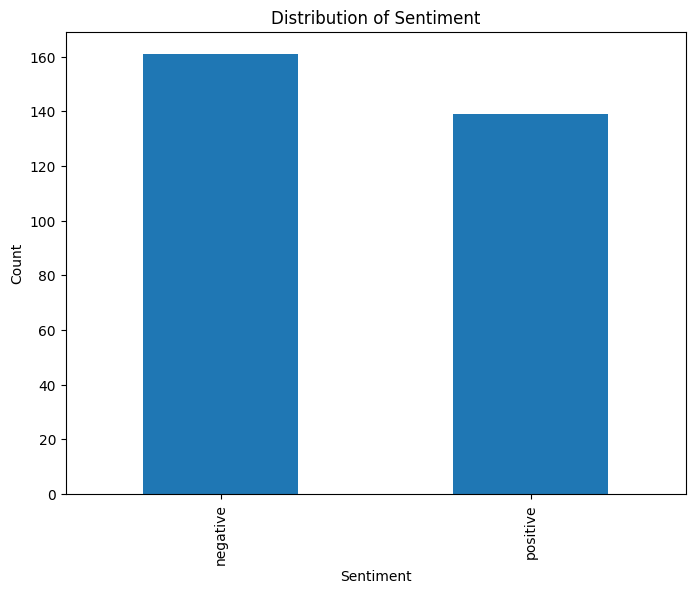

In [48]:
import matplotlib.pyplot as plt

# show distribution of the sentiments
ax = df['Sentiment'].value_counts().plot(kind='bar', figsize=(8,6), title="Distribution of Sentiment")
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
plt.show()

In [49]:
print("Numerical distribution:\n", (df['Sentiment'].value_counts()/df.shape[0]) * 100)

Numerical distribution:
 Sentiment
negative    53.666667
positive    46.333333
Name: count, dtype: float64


In [50]:
# check for any missing values
df.isnull().sum()

Id            0
Sentiment     0
Text Tweet    0
dtype: int64

In [51]:
# copy the original dataset to ensure its originality
cleaned_df = df.copy()

# function to find word inside < >
def find_placeholder(texts):
    found = re.findall(r'<\w+>', texts)
    return found

placeholders = set().union(*map(find_placeholder, cleaned_df['Text Tweet']))
placeholders

{'<PRODUCT_NAME>', '<PROVIDER_NAME>', '<URL>', '<USER_MENTION>'}

In [52]:
# function to find any emoticons
def find_emoticons(texts):
    return re.findall(r':\w+', texts)
emoticons = set().union(*map(find_emoticons, cleaned_df['Text Tweet']))
emoticons

{':D', ':v'}

In [53]:
# function to find hashtags and count its corresponding number of occurences

hashtags={}
for text in cleaned_df['Text Tweet']:
    founds = re.findall(r'#\w+', text)
    for found in founds:
        if found not in hashtags:
            hashtags[found] = 1
        else:
            hashtags[found] += 1
{k: v for k, v in sorted(hashtags.items(), key=lambda item: item[1], reverse=True)}

{'#Boikot': 24,
 '#4g': 3,
 '#internet': 2,
 '#setia': 2,
 '#LTE': 2,
 '#kuota': 2,
 '#Ruh212': 2,
 '#Speedtest': 2,
 '#Garut': 2,
 '#7eleven': 2,
 '#sevel': 2,
 '#BOIKOT_': 1,
 '#Bilboard': 1,
 '#Ramadhan': 1,
 '#HRS': 1,
 '#internetlelet': 1,
 '#4G': 1,
 '#lte': 1,
 '#HOAX': 1,
 '#CUG': 1,
 '#Community': 1,
 '#useless4g': 1,
 '#whatsappNotSave': 1,
 '#klinikKUMSda': 1,
 '#BAPER': 1,
 '#sawojajar': 1,
 '#malang': 1,
 '#boikot': 1,
 '#PKI': 1,
 '#PuasPake': 1,
 '#PointasticDeal': 1,
 '#telecommunications': 1,
 '#opinipenjualpulsa': 1,
 '#kuotagratis': 1,
 '#kuning': 1,
 '#biru': 1,
 '#LEMOT': 1,
 '#JARINGAN': 1,
 '#4glte': 1,
 '#BOGOR': 1,
 '#AREA': 1,
 '#gsm': 1,
 '#handphone': 1,
 '#Simpati': 1,
 '#janji': 1,
 '#capture': 1,
 '#kuotaaman': 1,
 '#onlyForU': 1,
 '#operator': 1,
 '#mantapjiwa': 1,
 '#opensignal': 1,
 '#passengers': 1,
 '#lemot': 1,
 '#Pandeglangkota': 1,
 '#koneksi': 1,
 '#Rp1': 1,
 '#TransaksiNormal': 1,
 '#Indonesia': 1,
 '#konsumen': 1,
 '#jadimurahan': 1,
 '#Tanya':

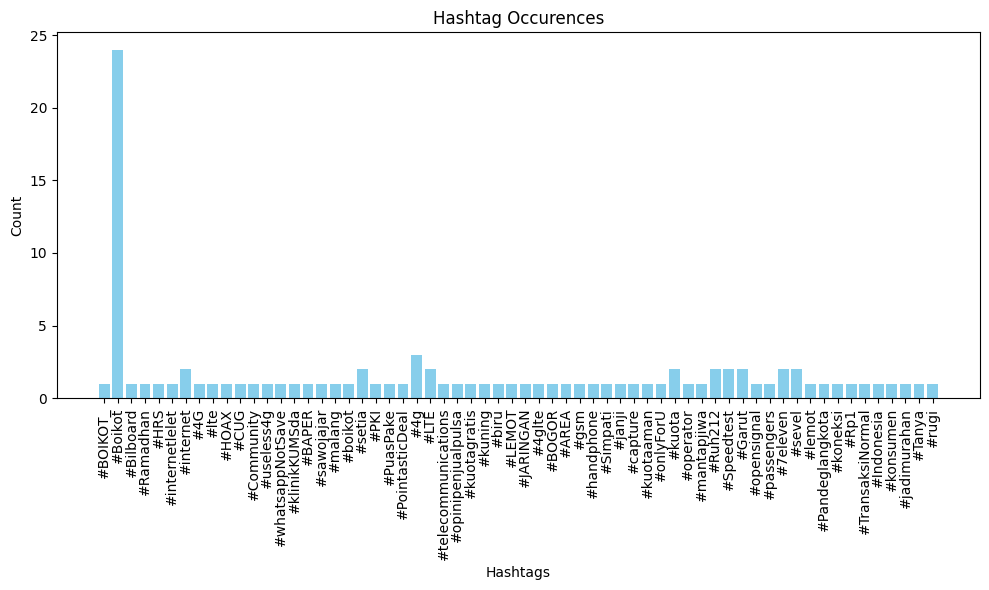

In [54]:
# hashtags distribution visualization
labels = list(hashtags.keys())
values = list(hashtags.values())

# create bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')

plt.xlabel("Hashtags")
plt.ylabel("Count")
plt.title("Hashtag Occurences")
plt.xticks(rotation=90)
plt.tight_layout()

# show plot
plt.show()

In [55]:
cleaned_df['Text Tweet'] = cleaned_df['Text Tweet'].apply(lambda x:x.replace('\xa0', ' '))
cleaned_df['Text Tweet'].tolist()

['<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>',
 'Saktinya balik lagi, alhamdulillah :v <PROVIDER_NAME>',
 'Selamat pagi <PROVIDER_NAME>  bisa bantu kenapa di dalam kamar sinyal 4G hilang yang 1 lagi panggilan darurat saja  <URL>',
 'Dear <PROVIDER_NAME> akhir2 ini jaringan data lemot banget padahal H+ !!!!',
 'Selamat malam PENDUSTA <PROVIDER_NAME> ',
 'Untuk penembakan paket dari <PRODUCT_NAME> masih gangguan ya <PROVIDER_NAME>',
 '<PROVIDER_NAME>  aku pakai <PROVIDER_NAME>, paket <PRODUCT_NAME> nya udah off tapi gantinya ada paket <PRODUCT_NAME> yg bisa gratisan youtube, senang banget <PROVIDER_NAME>',
 'RT <USER_MENTION>: <PROVIDER_NAME> tak ada lagi dalam kamus perhapean saya. #Boikot<PROVIDER_NAME> <URL>',
 'keluhan gak ditanggapi. bikin emosi aja. pulsaku dicuri terus. soak deh. masa setiap hari pulsa berkurang 1500-2100 bisa 2-3*/hari',
 '#Bilboard iklan <PROVIDER_NAME> kok ada pesan tersembunyi? #Boikot<PROVIDER_NAME> #Ramadhan <URL>',


In [56]:
# remove url, emoticon, and user_mention
def remove_url_emoticon_user(texts):
    texts = texts.replace('<URL>', '')
    texts = texts.replace('<USER_MENTION>', '')
    texts = re.sub(r':\w+', '', texts)
    return texts

cleaned_df['Text Tweet'] = cleaned_df['Text Tweet'].apply(remove_url_emoticon_user)
cleaned_df['Text Tweet'].tolist()

[' #BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>',
 'Saktinya balik lagi, alhamdulillah  <PROVIDER_NAME>',
 'Selamat pagi <PROVIDER_NAME>  bisa bantu kenapa di dalam kamar sinyal 4G hilang yang 1 lagi panggilan darurat saja  ',
 'Dear <PROVIDER_NAME> akhir2 ini jaringan data lemot banget padahal H+ !!!!',
 'Selamat malam PENDUSTA <PROVIDER_NAME> ',
 'Untuk penembakan paket dari <PRODUCT_NAME> masih gangguan ya <PROVIDER_NAME>',
 '<PROVIDER_NAME>  aku pakai <PROVIDER_NAME>, paket <PRODUCT_NAME> nya udah off tapi gantinya ada paket <PRODUCT_NAME> yg bisa gratisan youtube, senang banget <PROVIDER_NAME>',
 'RT : <PROVIDER_NAME> tak ada lagi dalam kamus perhapean saya. #Boikot<PROVIDER_NAME> ',
 'keluhan gak ditanggapi. bikin emosi aja. pulsaku dicuri terus. soak deh. masa setiap hari pulsa berkurang 1500-2100 bisa 2-3*/hari',
 '#Bilboard iklan <PROVIDER_NAME> kok ada pesan tersembunyi? #Boikot<PROVIDER_NAME> #Ramadhan ',
 '<PROVIDER_NAME> mampus!!!!! bulan puasa, su

In [57]:
# function to delete # symbol
def delete_hashtag(texts):
    return texts.replace('#', '')

cleaned_df['Text Tweet'] = cleaned_df['Text Tweet'].apply(delete_hashtag)
cleaned_df['Text Tweet'].to_list()

[' BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>',
 'Saktinya balik lagi, alhamdulillah  <PROVIDER_NAME>',
 'Selamat pagi <PROVIDER_NAME>  bisa bantu kenapa di dalam kamar sinyal 4G hilang yang 1 lagi panggilan darurat saja  ',
 'Dear <PROVIDER_NAME> akhir2 ini jaringan data lemot banget padahal H+ !!!!',
 'Selamat malam PENDUSTA <PROVIDER_NAME> ',
 'Untuk penembakan paket dari <PRODUCT_NAME> masih gangguan ya <PROVIDER_NAME>',
 '<PROVIDER_NAME>  aku pakai <PROVIDER_NAME>, paket <PRODUCT_NAME> nya udah off tapi gantinya ada paket <PRODUCT_NAME> yg bisa gratisan youtube, senang banget <PROVIDER_NAME>',
 'RT : <PROVIDER_NAME> tak ada lagi dalam kamus perhapean saya. Boikot<PROVIDER_NAME> ',
 'keluhan gak ditanggapi. bikin emosi aja. pulsaku dicuri terus. soak deh. masa setiap hari pulsa berkurang 1500-2100 bisa 2-3*/hari',
 'Bilboard iklan <PROVIDER_NAME> kok ada pesan tersembunyi? Boikot<PROVIDER_NAME> Ramadhan ',
 '<PROVIDER_NAME> mampus!!!!! bulan puasa, subuh2 

In [58]:
# replace placeholders with each category
def replace_placeholders(texts):
    texts = texts.replace('<PRODUCT_NAME>', 'product')
    texts = texts.replace('<PROVIDER_NAME>', 'provider')
    return texts

cleaned_df['Text Tweet'] = cleaned_df['Text Tweet'].apply(replace_placeholders)
cleaned_df['Text Tweet'].to_list()

[' BOIKOT_provider Gunakan Produk Bangsa Sendiri provider',
 'Saktinya balik lagi, alhamdulillah  provider',
 'Selamat pagi provider  bisa bantu kenapa di dalam kamar sinyal 4G hilang yang 1 lagi panggilan darurat saja  ',
 'Dear provider akhir2 ini jaringan data lemot banget padahal H+ !!!!',
 'Selamat malam PENDUSTA provider ',
 'Untuk penembakan paket dari product masih gangguan ya provider',
 'provider  aku pakai provider, paket product nya udah off tapi gantinya ada paket product yg bisa gratisan youtube, senang banget provider',
 'RT : provider tak ada lagi dalam kamus perhapean saya. Boikotprovider ',
 'keluhan gak ditanggapi. bikin emosi aja. pulsaku dicuri terus. soak deh. masa setiap hari pulsa berkurang 1500-2100 bisa 2-3*/hari',
 'Bilboard iklan provider kok ada pesan tersembunyi? Boikotprovider Ramadhan ',
 'provider mampus!!!!! bulan puasa, subuh2 mau sahur cek pulsa tersedot terus. dan sekarang sisa 30 ribu provider Tolong dibaca!!!',
 ' Pernah coba pakai provider tapi p

In [59]:
def remove_punctuations(texts):
    return re.sub(f"[{re.escape(string.punctuation)}]", " ", texts)

cleaned_df['Text Tweet'] = cleaned_df['Text Tweet'].apply(remove_punctuations)
cleaned_df['Text Tweet'].tolist()


[' BOIKOT provider Gunakan Produk Bangsa Sendiri provider',
 'Saktinya balik lagi  alhamdulillah  provider',
 'Selamat pagi provider  bisa bantu kenapa di dalam kamar sinyal 4G hilang yang 1 lagi panggilan darurat saja  ',
 'Dear provider akhir2 ini jaringan data lemot banget padahal H      ',
 'Selamat malam PENDUSTA provider ',
 'Untuk penembakan paket dari product masih gangguan ya provider',
 'provider  aku pakai provider  paket product nya udah off tapi gantinya ada paket product yg bisa gratisan youtube  senang banget provider',
 'RT   provider tak ada lagi dalam kamus perhapean saya  Boikotprovider ',
 'keluhan gak ditanggapi  bikin emosi aja  pulsaku dicuri terus  soak deh  masa setiap hari pulsa berkurang 1500 2100 bisa 2 3  hari',
 'Bilboard iklan provider kok ada pesan tersembunyi  Boikotprovider Ramadhan ',
 'provider mampus      bulan puasa  subuh2 mau sahur cek pulsa tersedot terus  dan sekarang sisa 30 ribu provider Tolong dibaca   ',
 ' Pernah coba pakai provider tapi p

In [60]:
# function to remove blankspaces more than one
def remove_blankspaces(text):
    return re.sub(' +', ' ', text)

cleaned_df['Text Tweet'] = cleaned_df['Text Tweet'].apply(remove_blankspaces)
cleaned_df['Text Tweet'].to_list()

[' BOIKOT provider Gunakan Produk Bangsa Sendiri provider',
 'Saktinya balik lagi alhamdulillah provider',
 'Selamat pagi provider bisa bantu kenapa di dalam kamar sinyal 4G hilang yang 1 lagi panggilan darurat saja ',
 'Dear provider akhir2 ini jaringan data lemot banget padahal H ',
 'Selamat malam PENDUSTA provider ',
 'Untuk penembakan paket dari product masih gangguan ya provider',
 'provider aku pakai provider paket product nya udah off tapi gantinya ada paket product yg bisa gratisan youtube senang banget provider',
 'RT provider tak ada lagi dalam kamus perhapean saya Boikotprovider ',
 'keluhan gak ditanggapi bikin emosi aja pulsaku dicuri terus soak deh masa setiap hari pulsa berkurang 1500 2100 bisa 2 3 hari',
 'Bilboard iklan provider kok ada pesan tersembunyi Boikotprovider Ramadhan ',
 'provider mampus bulan puasa subuh2 mau sahur cek pulsa tersedot terus dan sekarang sisa 30 ribu provider Tolong dibaca ',
 ' Pernah coba pakai provider tapi parah koneksinya ',
 'Setuju si

In [61]:
# transform to lowercase
cleaned_df['Text Tweet'] = cleaned_df['Text Tweet'].apply(lambda text:text.lower())
cleaned_df['Text Tweet'].tolist()

[' boikot provider gunakan produk bangsa sendiri provider',
 'saktinya balik lagi alhamdulillah provider',
 'selamat pagi provider bisa bantu kenapa di dalam kamar sinyal 4g hilang yang 1 lagi panggilan darurat saja ',
 'dear provider akhir2 ini jaringan data lemot banget padahal h ',
 'selamat malam pendusta provider ',
 'untuk penembakan paket dari product masih gangguan ya provider',
 'provider aku pakai provider paket product nya udah off tapi gantinya ada paket product yg bisa gratisan youtube senang banget provider',
 'rt provider tak ada lagi dalam kamus perhapean saya boikotprovider ',
 'keluhan gak ditanggapi bikin emosi aja pulsaku dicuri terus soak deh masa setiap hari pulsa berkurang 1500 2100 bisa 2 3 hari',
 'bilboard iklan provider kok ada pesan tersembunyi boikotprovider ramadhan ',
 'provider mampus bulan puasa subuh2 mau sahur cek pulsa tersedot terus dan sekarang sisa 30 ribu provider tolong dibaca ',
 ' pernah coba pakai provider tapi parah koneksinya ',
 'setuju si

In [62]:
# remove words repetition
def remove_repetition(text):
    return re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1', text)

cleaned_df['Text Tweet'] = cleaned_df['Text Tweet'].apply(remove_repetition)
cleaned_df['Text Tweet'].tolist()

[' boikot provider gunakan produk bangsa sendiri provider',
 'saktinya balik lagi alhamdulillah provider',
 'selamat pagi provider bisa bantu kenapa di dalam kamar sinyal 4g hilang yang 1 lagi panggilan darurat saja ',
 'dear provider akhir2 ini jaringan data lemot banget padahal h ',
 'selamat malam pendusta provider ',
 'untuk penembakan paket dari product masih gangguan ya provider',
 'provider aku pakai provider paket product nya udah off tapi gantinya ada paket product yg bisa gratisan youtube senang banget provider',
 'rt provider tak ada lagi dalam kamus perhapean saya boikotprovider ',
 'keluhan gak ditanggapi bikin emosi aja pulsaku dicuri terus soak deh masa setiap hari pulsa berkurang 1500 2100 bisa 2 3 hari',
 'bilboard iklan provider kok ada pesan tersembunyi boikotprovider ramadhan ',
 'provider mampus bulan puasa subuh2 mau sahur cek pulsa tersedot terus dan sekarang sisa 30 ribu provider tolong dibaca ',
 ' pernah coba pakai provider tapi parah koneksinya ',
 'setuju si

In [63]:
# cleaned_df['word_count'] = cleaned_df['Text Tweet'].apply(lambda x:len(x.split()))
# cleaned_df.head()

In [64]:
# preprocessing data
# tokenization
cleaned_df['token'] = cleaned_df['Text Tweet'].apply(nltk.word_tokenize)
cleaned_df.head()

,Id,Sentiment,Text Tweet,token
0,1,positive,boikot provider gunakan produk bangsa sendiri...,"[boikot, provider, gunakan, produk, bangsa, se..."
1,2,positive,saktinya balik lagi alhamdulillah provider,"[saktinya, balik, lagi, alhamdulillah, provider]"
2,3,negative,selamat pagi provider bisa bantu kenapa di dal...,"[selamat, pagi, provider, bisa, bantu, kenapa,..."
3,4,negative,dear provider akhir2 ini jaringan data lemot b...,"[dear, provider, akhir2, ini, jaringan, data, ..."
4,5,negative,selamat malam pendusta provider,"[selamat, malam, pendusta, provider]"


In [65]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('popular')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\user\App

True

<BarContainer object of 10 artists>

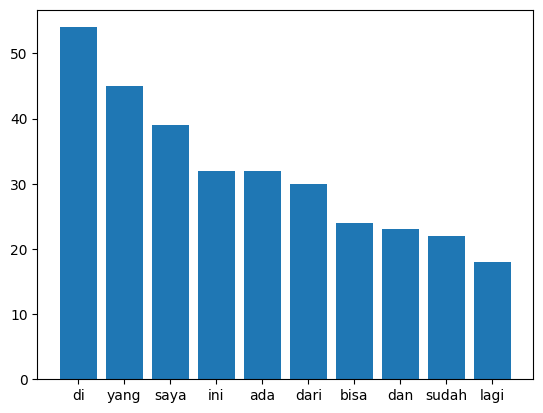

In [66]:
# indonesian_stopwords = stopwords.words('indonesian')
# cleaned_df['token'] = cleaned_df['token'].apply(lambda x: [word for word in x if word not in indonesian_stopwords])
# cleaned_df

stop=set(stopwords.words('indonesian'))

new= cleaned_df['Text Tweet'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)


In [67]:
corpus

['boikot',
 'provider',
 'gunakan',
 'produk',
 'bangsa',
 'sendiri',
 'provider',
 'saktinya',
 'balik',
 'lagi',
 'alhamdulillah',
 'provider',
 'selamat',
 'pagi',
 'provider',
 'bisa',
 'bantu',
 'kenapa',
 'di',
 'dalam',
 'kamar',
 'sinyal',
 '4g',
 'hilang',
 'yang',
 '1',
 'lagi',
 'panggilan',
 'darurat',
 'saja',
 'dear',
 'provider',
 'akhir2',
 'ini',
 'jaringan',
 'data',
 'lemot',
 'banget',
 'padahal',
 'h',
 'selamat',
 'malam',
 'pendusta',
 'provider',
 'untuk',
 'penembakan',
 'paket',
 'dari',
 'product',
 'masih',
 'gangguan',
 'ya',
 'provider',
 'provider',
 'aku',
 'pakai',
 'provider',
 'paket',
 'product',
 'nya',
 'udah',
 'off',
 'tapi',
 'gantinya',
 'ada',
 'paket',
 'product',
 'yg',
 'bisa',
 'gratisan',
 'youtube',
 'senang',
 'banget',
 'provider',
 'rt',
 'provider',
 'tak',
 'ada',
 'lagi',
 'dalam',
 'kamus',
 'perhapean',
 'saya',
 'boikotprovider',
 'keluhan',
 'gak',
 'ditanggapi',
 'bikin',
 'emosi',
 'aja',
 'pulsaku',
 'dicuri',
 'terus',
 'so

In [ ]:
# function to do stemming using PySastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text):
    text_to_string = ' '.join(text)
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text_to_string)
    
cleaned_df['token'] = cleaned_df['token'].apply(stemming)
cleaned_df.head()

,Id,Sentiment,Text Tweet,token
0,1,positive,boikot provider gunakan produk bangsa sendiri...,boikot provider guna produk bangsa sendiri pro...
1,2,positive,saktinya balik lagi alhamdulillah provider,sakti balik lagi alhamdulillah provider
2,3,negative,selamat pagi provider bisa bantu kenapa di dal...,selamat pagi provider bisa bantu kenapa di dal...
3,4,negative,dear provider akhir2 ini jaringan data lemot b...,dear provider akhir2 ini jaring data lot bange...
4,5,negative,selamat malam pendusta provider,selamat malam dusta provider


In [ ]:
# encode the sentiment (target), 1 for positive, 0 for negative
cleaned_df['Sentiment'].replace({'positive':1, 'negative':0}, inplace=True)
cleaned_df = cleaned_df.drop('Id', axis=1)
cleaned_df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_10644\3599534820.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df['Sentiment'].replace({'positive':1, 'negative':0}, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_10644\3599534820.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  

,Sentiment,Text Tweet,token
0,1,boikot provider gunakan produk bangsa sendiri...,boikot provider guna produk bangsa sendiri pro...
1,1,saktinya balik lagi alhamdulillah provider,sakti balik lagi alhamdulillah provider
2,0,selamat pagi provider bisa bantu kenapa di dal...,selamat pagi provider bisa bantu kenapa di dal...
3,0,dear provider akhir2 ini jaringan data lemot b...,dear provider akhir2 ini jaring data lot bange...
4,0,selamat malam pendusta provider,selamat malam dusta provider


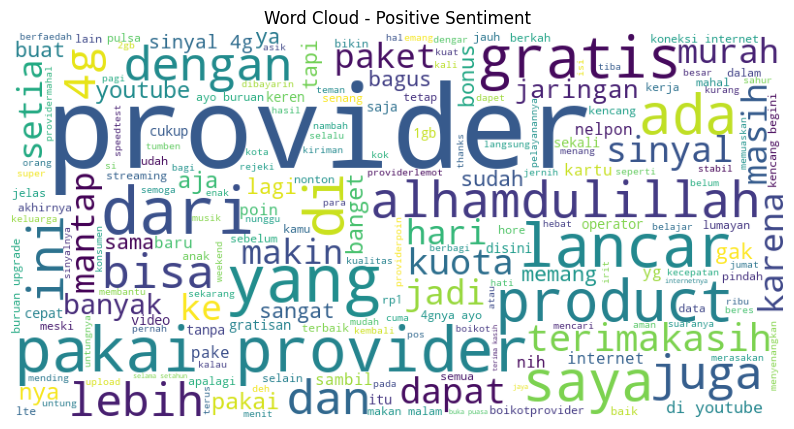

In [ ]:
from wordcloud import WordCloud
# positive sentiment

positive_sentiments = cleaned_df[cleaned_df['Sentiment'] == 1]['Text Tweet']
positive_text = ' '.join(positive_sentiments)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud - Positive Sentiment')
plt.show()

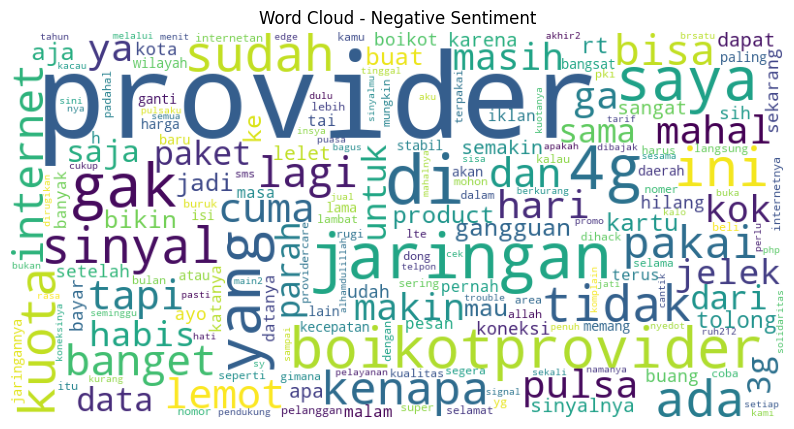

In [ ]:
# negative sentiments
negative_sentiments = cleaned_df[cleaned_df['Sentiment'] == 0]['Text Tweet']
negative_text = ' '.join(negative_sentiments)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# display the wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud - Negative Sentiment')
plt.show()

In [84]:
# data split
from sklearn.model_selection import train_test_split

X = cleaned_df['token']
Y = cleaned_df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


In [ ]:
# turns the "token" column into vector representation
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [86]:
# train the SVM model
from sklearn.svm import  SVC

model = SVC(kernel='sigmoid', coef0=0.1, gamma=0.9, C=1, max_iter=1000)

model.fit(X_train_vec, y_train)

SVC(C=1, coef0=0.1, gamma=0.9, kernel='sigmoid', max_iter=1000)

In [ ]:
# show the model's performance
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_vec)
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Accuracy achieved: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        32
           1       0.93      0.89      0.91        28

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60

Accuracy achieved:  0.9166666666666666


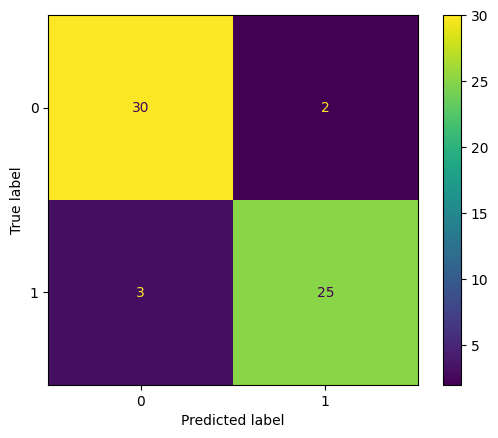

In [ ]:
# confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [77]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# tokenizer = Tokenizer(num_words=1000, oov_token = '<OOV>')
# tokenizer.fit_on_texts(X_train)
# word_index = tokenizer.word_index
# VOCAB_SIZE = 1000
# VOCAB_SIZE

In [78]:
# maxlen = 32 
# maxlen

In [79]:
# train_sequences = tokenizer.texts_to_sequences(X_train)
# train_padded_sequences = pad_sequences(train_sequences,maxlen=maxlen,padding='post',truncating='post')
# test_sequences = tokenizer.texts_to_sequences(X_test)
# test_padded_sequences = pad_sequences(test_sequences,maxlen=maxlen,padding='post',truncating='post')

In [80]:
# embedding_dim = 32
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(VOCAB_SIZE+1, 32, input_length=maxlen),
#     tf.keras.layers.LSTM(4),
#     # tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# model.compile(loss = 'binary_crossentropy',
#                 optimizer = tf.keras.optimizers.Adam(),
#                 metrics = ['accuracy'])

In [81]:
# history =  model.fit(train_padded_sequences,
#                     y_train,
#                     validation_data = (test_padded_sequences, y_test),
#                     epochs = 20,
#                     batch_size=8
#                     )

In [82]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs_range = range(len(acc))

# plt.figure(figsize=(14,5))

# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Train Acc')
# plt.plot(epochs_range, val_acc, label='Val Acc')
# plt.legend(loc='lower right')
# plt.title('Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Train Loss')
# plt.plot(epochs_range, val_loss, label='Val Loss')
# plt.legend(loc='upper right')
# plt.title('Loss')

# plt.show()